# 01: Diving Right In

These tutorials are organized around [xarray](https://xarray.pydata.org), which provides a powerful set of tools for analyzing climate data, including spatial distributions and time series. Because the time for this training is limited, we dive right into using [xarray](https://xarray.pydata.org) without working through the [basic](https://docs.python.org/3/tutorial/datastructures.html) and [intermediate](https://pandas.pydata.org/) building blocks that xarray extends. Links to resources that provide additional details on those building blocks are included throughout.  

One building block that does require special mention is modules. Python is a modular language, meaning that we often use it by loading a number of specialized extensions. This reliance on modules has both advantages and disadvantages. The most important advantages are that
1. We can each build our own bespoke programming environment (or [environments](https://www.anaconda.com/docs/tools/working-with-conda/environments)) based around the tools we use most often
2. We only need to load the tools we will actually use for any given task
3. Code is more readable and tracable

The main disadvantages are that
1. Modules may conflict with each other, and these conflicts can in some cases break the environment
2. Many modules are maintained by volunteers, who may or may not have time to keep them updated

The use of [conda-forge](https://conda-forge.org/) mitigates both of these disadvantages, and is highly recommended!

Once you have installed python and the required modules ([see readme](README.md)), import the modules needed for this example as follows. Note the different ways to import modules.

In [ ]:
import colormaps
import cftime

The most basic way to import a module. Methods and other objects provided by the module are then accessible by:

    cmap = colormaps.dense

In [2]:
import numpy as np
import xarray as xr
import seaborn as sns

We can simplify our code by assigning abbreviations to the imported modules. We can then access methods by, for example:

    a = np.arange(10)

Just make sure not to create any variables that conflict with the module names!

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.util as cputil

Similarly, we may access some submodules directly, assigning each its own abbreviation to simplify access:

    fig = plt.figure(figsize=(8,4))

In [4]:
from scipy.stats import linregress

This type of import is useful if we only need to access one or two objects from the module. We can then use the method directly as:

    rgr = linregress(x,y)

Once you've run the blocks above, we can get started with data analysis! Reading a netcdf data file is done by using the [open_dataset()](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html#xarray.open_dataset) method in xarray. This same interface can be used to read other file types, including the [grib format](https://docs.xarray.dev/en/stable/user-guide/io.html#grib-format-via-cfgrib) used by many weather prediction centers, as long as the appropriate engine is installed. 
- [Input / output options in xarray](https://docs.xarray.dev/en/stable/user-guide/io.html)

In [5]:
ncdf = xr.open_dataset('./data/od550aer_mon_historical_HadGEM3-GC31-LL_1850-2014.2p5.ens_5mem.nc')

The file loaded below provides pre-processed aerosol optical depths simulated by the [HadGEM3-GC3.1](https://doi.org/10.1029/2019MS001995) Earth system model developed for [CMIP6](https://wcrp-cmip.org/cmip-phases/cmip6/) by the [UK Met Office Hadley Centre](https://weather.metoffice.gov.uk/climate/met-office-hadley-centre/index).
- [Information on HadGEM3](https://www.metoffice.gov.uk/research/approach/modelling-systems/unified-model/climate-models/hadgem3)

To see a summary of the contents in the file, we can simply type the name of the variable by itself in a code block. Note that only the last variable typed in a given block will be shown as output.

In [6]:
ncdf

<xarray.Dataset> Size: 405MB
Dimensions:    (time: 1980, bnds: 2, lon: 144, lat: 71, record: 5)
Coordinates:
  * time       (time) object 16kB 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lon        (lon) float64 1kB -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
  * lat        (lat) float64 568B -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5
Dimensions without coordinates: bnds, record
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    od550aer   (record, time, lat, lon) float32 405MB ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 2.4.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 HadGEM3-GC31-LL (2016): \naerosol: UKCA-GLOMAP-mo...
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/173a4ca1-7997-4780-93cd-219028535e24
    CDO:                    Climate Data Operators version 2.4.4 (https://mpi...
    NCO:                    netCDF Operators version 5.2.9 (Homepage = http:/...

The contents include global monthly-mean distributions of aerosol optical depth at 550 nm simulated for the period 1850-2014. Five [ensemble members](https://doi.org/10.1029/2023MS004135) are included (record=5), differing only in their initial conditions. 

The variable named <code>ncdf</code> is an [xarray](https://xarray.pydata.org) Dataset object. You can find a lot of information about the data under "Attributes". In this example, we will process the variable named <code>od550aer</code>, which contains monthly-mean aerosol optical depths with dimensions of latitude, longitude, time, and record. First, we access the variable by indexing the file with its name:

In [7]:
aod = ncdf['od550aer']
aod

<xarray.DataArray 'od550aer' (record: 5, time: 1980, lat: 71, lon: 144)> Size: 405MB
[101217600 values with dtype=float32]
Coordinates:
  * time     (time) object 16kB 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lon      (lon) float64 1kB -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 568B -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
Dimensions without coordinates: record
Attributes:
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol_parti...
    long_name:      Ambient Aerosol Optical Thickness at 550nm
    units:          1
    comment:        AOD from the ambient aerosols (i.e., includes aerosol wat...
    original_name:  mo: (stash: m01s02i285, lbplev: 3, lbproc: 128) + (stash:...
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T11:48:03Z altered by CMOR: Treated scalar dime...

Unlike <code>ncdf</code>, <code>tas</code> is a DataArray object. You can find more information about xarray data structures [here](https://docs.xarray.dev/en/stable/user-guide/data-structures.html). Again we find useful information under the attributes tab, including the units, various names of the variable, and a brief description of what it contains. 

The next step is to calculate the climatological mean distribution from the first ensemble member and plot it. xarray makes this step extraordinarily easy:

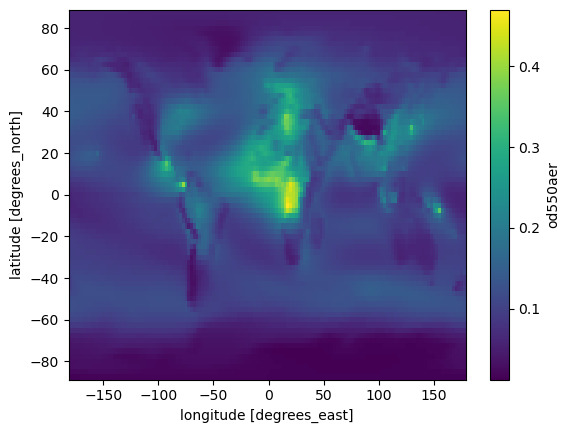

In [8]:
aod.isel(record=0).mean('time').plot()

This plot is useful mainly as a quick look. For example, what is the range of the data? Does it contain any missing values? Does the distribution match our expectations? 

- [Indexing and selecting data in xarray](https://docs.xarray.dev/en/stable/user-guide/indexing.html)
- [Climate data in xarray](https://docs.xarray.dev/en/stable/user-guide/weather-climate.html)

In the next example, we'll work through some ways to make the plot prettier.